In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
!pip install mglearn

C:\Users\GSENR\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


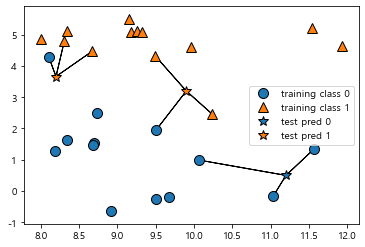

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

C:\Users\GSENR\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


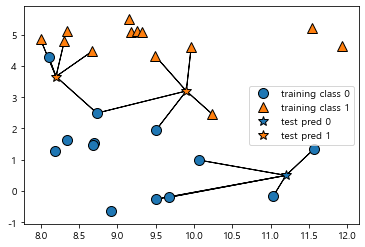

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

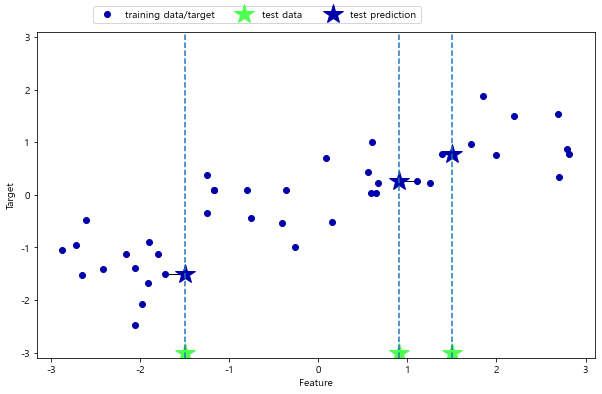

In [6]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

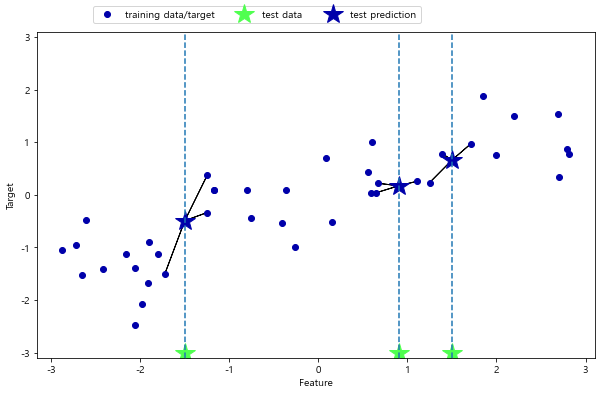

In [7]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                             random_state=0)

C:\Users\GSENR\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


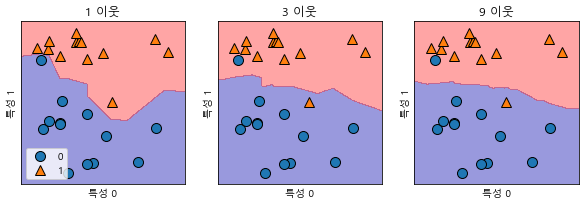

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    model = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, 
                                    fill=True, eps=0.5, ax=ax, alpha=.4)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

In [11]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

In [12]:
cancer = load_breast_cancer()
print("cancer.keys() : \n{}".format(cancer.keys()))
print("유방암 데이터의 행열 : {}".format(cancer.data.shape))

cancer.keys() : 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
유방암 데이터의 행열 : (569, 30)


In [13]:
print("특성이름(featuer_names) : {}".format(cancer['feature_names']))
print("유방암 데이터의 형태 : ", cancer.data.shape)
print()
print("클래스 이름(target_names) : {}".format(cancer['target_names']))
print("클래스별 샘플 개수 : \n",np.bincount(cancer.target))

특성이름(featuer_names) : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
유방암 데이터의 형태 :  (569, 30)

클래스 이름(target_names) : ['malignant' 'benign']
클래스별 샘플 개수 : 
 [212 357]


In [14]:
### 데이터 준비
### 데이터 나누기 : 자체 학습 및 자체 평가
### 모델 선정
### 모델 학습
### 모델 예측 or 모델 평가
### 모델 평가(학습용), 모델 평가(테스트용)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 77)


In [32]:
print(len(y_train))
y_1_all = (y == 1).sum()
y_0_all = (y == 0).sum()

print(f"target y의 \n 0의 개수 : {y_0_all} \n 1의 개수 : {y_1_all}")

426
target y의 
 0의 개수 : 212 
 1의 개수 : 357


In [18]:
y_train_1 = (y_train == 1).sum()
y_test_1 = (y_test == 1).sum()

y_train_0 = len(y_train) - (y_train == 1).sum()
y_test_0 = len(y_test) - (y_test == 1).sum()

print("데이터 셋의 target(학습:테스트)의 비율 - 1에 대해서")
print(f"train비율 : {y_train_1/y_1_all}, test비율 : {y_test_1/y_1_all}")

print("데이터 셋의 target(학습:테스트)의 비율 - 0에 대해서")
print(f"train비율 : {y_train_0/y_0_all}, test비율 : {y_test_0/y_0_all}")

데이터 셋의 target(학습:테스트)의 비율 - 1에 대해서
train비율 : 0.7507002801120448, test비율 : 0.24929971988795518
데이터 셋의 target(학습:테스트)의 비율 - 0에 대해서
train비율 : 0.7452830188679245, test비율 : 0.25471698113207547


In [19]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3) # 알고리즘 지정
model.fit(X_train, y_train)  # 학습 
pred = model.predict(X_test) # 예측
pred

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [20]:
# 예측 후, 정확도 구하기
(pred == y_test).sum()/(len(pred))

0.951048951048951

In [21]:
acc_tr = model.score(X_train, y_train)   # 정확도(학습용 데이터)
acc_test = model.score(X_test, y_test)   # 정확도(테스트 데이터)
acc_tr, acc_test

(0.9530516431924883, 0.951048951048951)

In [22]:
print("k : {}".format(3))
print("훈련 데이터셋 정확도 : {:.2f}".format(acc_tr))
print("테스트 데이터 셋 정확도 : {:.2f}".format(acc_test))

k : 3
훈련 데이터셋 정확도 : 0.95
테스트 데이터 셋 정확도 : 0.95


In [23]:
k_list = []
tr_acc = []
test_acc = []
k_nums = range(1, 22, 2)# 1,3,5~21

for n in k_nums:
    # 모델 선택 및 학습 
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    
    # 정확도 구하기 
    acc_tr = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    
    # 정확도 값 저장.
    k_list.append(n)
    tr_acc.append(acc_tr)
    test_acc.append(acc_test)
    
    print("k : ", n)
    print("학습용셋 정확도 {:.3f}".format(acc_tr) )
    print("테스트용셋 정확도 {:.3f}".format(acc_test) )

k :  1
학습용셋 정확도 1.000
테스트용셋 정확도 0.923
k :  3
학습용셋 정확도 0.953
테스트용셋 정확도 0.951
k :  5
학습용셋 정확도 0.944
테스트용셋 정확도 0.937
k :  7
학습용셋 정확도 0.937
테스트용셋 정확도 0.958
k :  9
학습용셋 정확도 0.934
테스트용셋 정확도 0.958
k :  11
학습용셋 정확도 0.934
테스트용셋 정확도 0.958
k :  13
학습용셋 정확도 0.934
테스트용셋 정확도 0.951
k :  15
학습용셋 정확도 0.932
테스트용셋 정확도 0.951
k :  17
학습용셋 정확도 0.930
테스트용셋 정확도 0.958
k :  19
학습용셋 정확도 0.925
테스트용셋 정확도 0.951
k :  21
학습용셋 정확도 0.927
테스트용셋 정확도 0.944


In [24]:
import seaborn as sns
import pandas as pd
print(sns.__version__)

0.11.2


In [25]:
# tr_acc = []
# test_acc = []
dat = { "tr_acc":tr_acc, "test_acc":test_acc }
data_df = pd.DataFrame(dat, index=k_list)
data_df

,tr_acc,test_acc
1,1.000000,0.923077
3,0.953052,0.951049
5,0.943662,0.937063
7,0.936620,0.958042
9,0.934272,0.958042
11,0.934272,0.958042
13,0.934272,0.951049
15,0.931925,0.951049
17,0.929577,0.958042
19,0.924883,0.951049


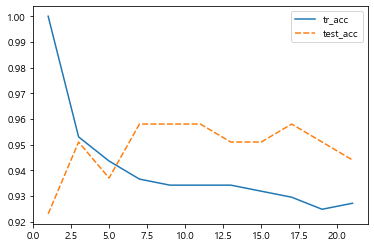

In [26]:
sns.lineplot(data=data_df, palette="tab10")
plt.show()

Text(0, 0.5, 'knn - accuracy')

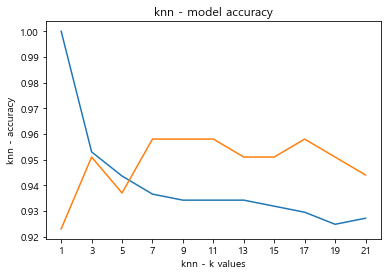

In [27]:
import matplotlib.pyplot as plt

plt.plot(k_nums, tr_acc, '-')
plt.plot(k_nums, test_acc, '-')
plt.xticks(k_nums)                # x축 지정

# 제목, x축, y축 레이블
plt.title("knn - model accuracy")
plt.xlabel("knn - k values")
plt.ylabel("knn - accuracy")